# House Pricing Analysis

## Prepare the Work Environment

### Import modules

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Read Data

In [4]:
df_train = pd.read_csv('train.csv')

In [8]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Start with Visualizing cool stuff

### Visualize the Sale Prices distribution

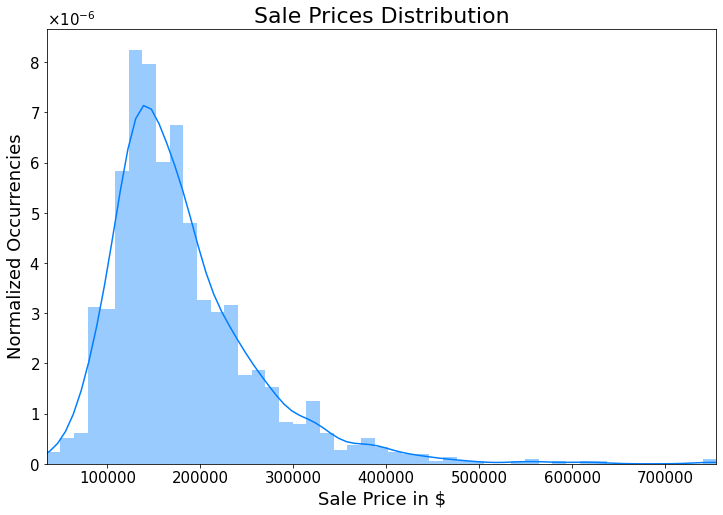

In [58]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

sns.distplot(df_train['SalePrice'], color = '#007EFF', hist = True, ax = ax)

ax.set_xlim(left = df_train['SalePrice'].min(), right = df_train['SalePrice'].max())

ax.set_xlabel('Sale Price in $', fontsize = 18)
ax.set_ylabel('Normalized Occurrencies', fontsize = 18)
ax.set_title('Sale Prices Distribution', fontsize = 22)

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.yaxis.get_offset_text().set_fontsize(15)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

plt.show()

### Look for some Correlation between Sale Price and other variables

In [113]:
def lin(x, a, b):
    return a * x + b

def exp(x, a, b, c):
    return a * np.exp(b * x) + c

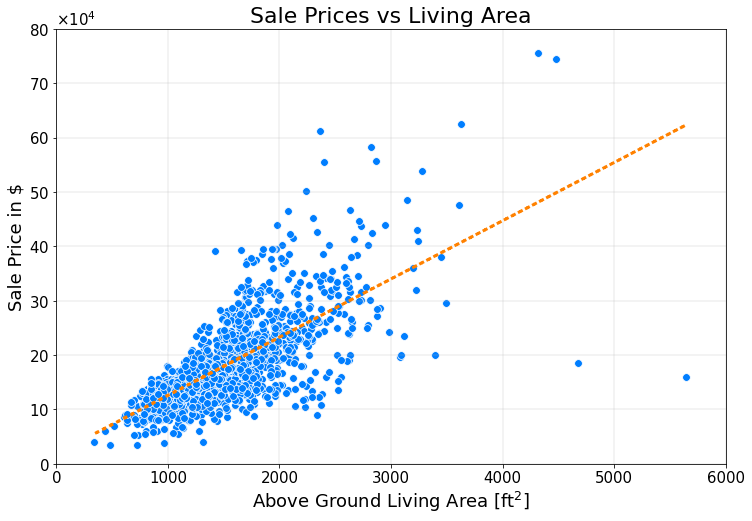

In [251]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.grid(axis='both', linewidth = .3)

par_lin, cov_lin = curve_fit(lin, df_train['GrLivArea'], df_train['SalePrice'])

sns.scatterplot(x = df_train['GrLivArea'], y = df_train['SalePrice'], color = '#007EFF', s = 60, ax = ax)

ax.plot(df_train['GrLivArea'], lin(df_train['GrLivArea'], *par_lin), color = '#ff8100', linewidth = 3, linestyle = 'dotted')

ax.set_xlabel(r'Above Ground Living Area [ft$^2$]', fontsize = 18)
ax.set_ylabel('Sale Price in $', fontsize = 18)
ax.set_title('Sale Prices vs Living Area', fontsize = 22)

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.yaxis.get_offset_text().set_fontsize(15)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (4,4))

ax.set_xlim(left = 0, right = 6000)
ax.set_ylim(bottom = 0, top = 8e5)

plt.show()

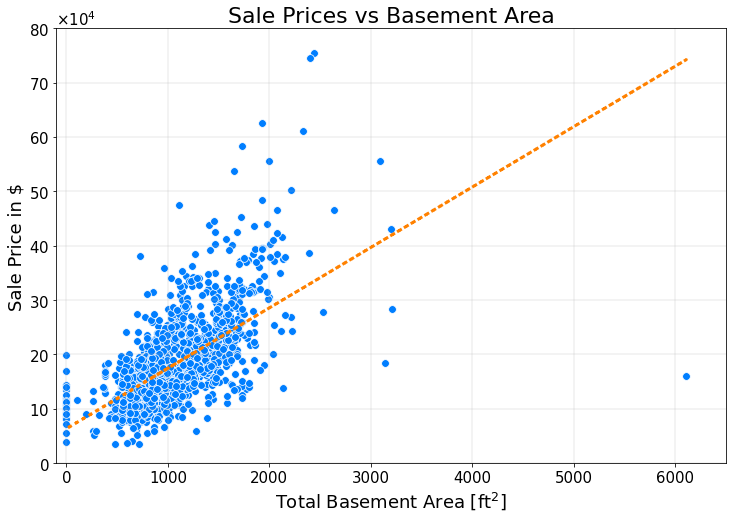

In [252]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.grid(axis='both', linewidth = .3)

par_lin, cov_lin = curve_fit(lin, df_train['TotalBsmtSF'], df_train['SalePrice'])

sns.scatterplot(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'], color = '#007EFF', s = 60, ax = ax)

ax.plot(df_train['TotalBsmtSF'], lin(df_train['TotalBsmtSF'], *par_lin), color = '#ff8100', linewidth = 3, linestyle = 'dotted')

ax.set_xlabel(r'Total Basement Area [ft$^2$]', fontsize = 18)
ax.set_ylabel('Sale Price in $', fontsize = 18)
ax.set_title('Sale Prices vs Basement Area', fontsize = 22)

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.yaxis.get_offset_text().set_fontsize(15)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (4,4))

ax.set_xlim(left = -100, right = 6500)
ax.set_ylim(bottom = 0, top = 8e5)

plt.show()

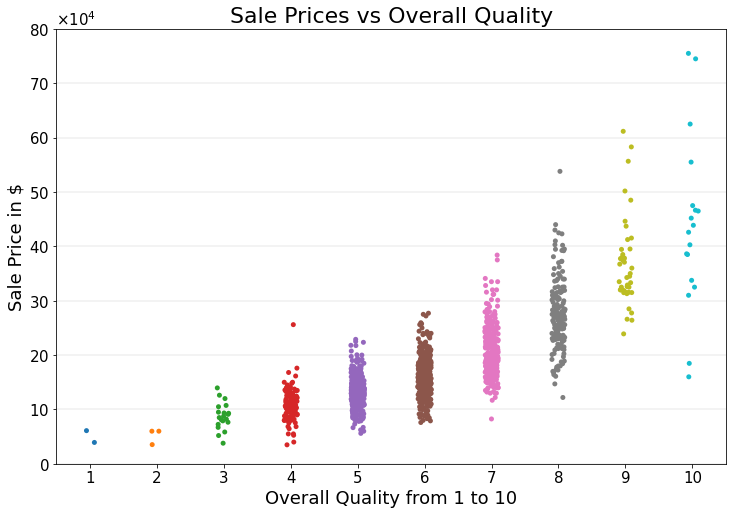

In [245]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.grid(axis='y', linewidth = .3)

sns.stripplot(x = df_train['OverallQual'], y = df_train['SalePrice'], ax = ax)

ax.set_xlabel('Overall Quality from 1 to 10', fontsize = 18)
ax.set_ylabel('Sale Price in $', fontsize = 18)
ax.set_title('Sale Prices vs Overall Quality', fontsize = 22)

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.yaxis.get_offset_text().set_fontsize(15)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (4,4))

ax.set_xlim(left = -0.5, right = 9.5)
ax.set_ylim(bottom = 0, top = 8e5)

plt.show()

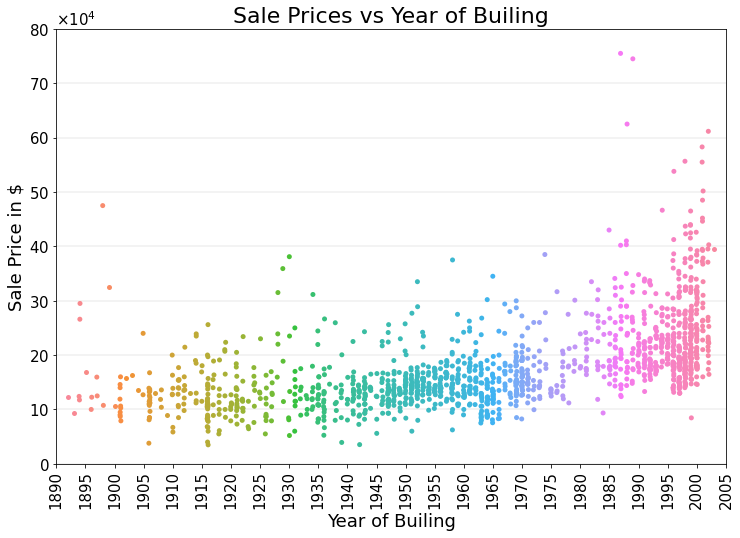

In [357]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.grid(axis='y', linewidth = .3)

sns.stripplot(x = df_train['YearBuilt'], y = df_train['SalePrice'], ax = ax)

ax.set_xlabel('Year of Builing', fontsize = 18)
ax.set_ylabel('Sale Price in $', fontsize = 18)
ax.set_title('Sale Prices vs Year of Builing', fontsize = 22)

ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.yaxis.get_offset_text().set_fontsize(15)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (4,4))

ax.set_xlim(left = -2, right = 112)
ax.set_ylim(bottom = 0, top = 8e5)

ax.set(xticks=np.arange(-2, 118, 5), xticklabels=np.arange(1890, 2010, 5))

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90 )

plt.show()